In [1]:
# Author Hussain Abbas
# Copyright 2023. All Rights Reserved
# Source: https://github.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset

In [2]:
# Install dependencies not already available in Colab

!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 15.4 MB

In [2]:
# pycaret useful links
# https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup
# https://pycaret.gitbook.io/docs/get-started/quickstart#analyze-model

import pandas as pd
from pycaret.classification import *

pd.set_option('display.max_columns', None)

In [5]:
# Read in data and check the shape.

df = pd.read_csv("project.csv")

df.shape

(40886, 21)

In [6]:
# Check each column, to see how many rows have missing data

print(df.isna().sum())

id                     0
track                  0
artist                 0
uri                    0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
time_signature         0
chorus_hit             0
sections               0
hit                 7429
decade                 0
dtype: int64


In [7]:
# Check data types

df.dtypes

id                    int64
track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
hit                 float64
decade               object
dtype: object

In [8]:
# Investigate data

df.head()

,id,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit,decade
0,1,The Continental Walk,The Rollers,spotify:track:00Bu7AiNb06604KMuYTQAi,0.603,0.732,0,-5.647,1,0.0372,0.807,0.000000,0.0993,0.802,105.425,144000,3,31.93079,6,1.0,60s
1,2,Two Lovers,Mary Wells,spotify:track:00CmjeeHvAVKvx3tcIiZTy,0.678,0.405,2,-16.965,1,0.0304,0.426,0.000000,0.1090,0.960,105.902,167000,4,29.18796,8,1.0,60s
2,3,If I Knew,Nat King Cole,spotify:track:00Vwp9jQUs52JOnbbLaz5e,0.371,0.386,1,-9.238,1,0.0308,0.708,0.000467,0.0787,0.169,80.207,168000,4,57.12898,7,1.0,60s
3,4,"Lara's Theme from ""Dr. Zhivago""",Roger Williams,spotify:track:00YhuN9oOmXUyLQiHjXPxt,0.361,0.280,7,-13.422,1,0.0294,0.821,0.435000,0.1440,0.213,82.298,160000,3,38.22192,8,1.0,60s
4,5,Say Wonderful Things,Patti Page,spotify:track:010BIyGminG03GMg8afVAq,0.490,0.440,3,-9.387,1,0.0321,0.874,0.000000,0.3370,0.426,109.329,140000,3,21.83825,7,1.0,60s


In [9]:
# Generate summary statistics

df.describe()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit
count,40886.00000,40886.00000,40886.000000,40886.000000,40886.000000,40886.000000,40886.000000,40886.000000,40886.000000,40886.000000,40886.000000,40886.000000,4.088600e+04,40886.000000,40886.000000,40886.000000,33457.000000
mean,20443.50000,0.53999,0.579493,5.210732,-10.214428,0.693758,0.072872,0.364347,0.153476,0.201539,0.543294,119.334506,2.346113e+05,3.893704,40.094518,10.466957,0.503482
std,11802.91589,0.17759,0.252287,3.535160,5.302793,0.460937,0.086006,0.338650,0.302786,0.172879,0.267087,29.092214,1.188378e+05,0.423131,18.994295,4.864456,0.499995
min,1.00000,0.00000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000
25%,10222.25000,0.42000,0.396000,2.000000,-12.808000,0.000000,0.033700,0.039800,0.000000,0.094100,0.331000,97.393250,1.730000e+05,4.000000,27.603282,8.000000,0.000000
50%,20443.50000,0.55200,0.601000,5.000000,-9.249500,1.000000,0.043400,0.259000,0.000116,0.132000,0.559000,117.530500,2.180000e+05,4.000000,35.846255,10.000000,1.000000
75%,30664.75000,0.66900,0.787000,8.000000,-6.374250,1.000000,0.069700,0.676000,0.059000,0.261000,0.768000,136.494000,2.660000e+05,4.000000,47.602343,12.000000,1.000000
max,40886.00000,0.98800,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170000e+06,5.000000,433.182000,169.000000,1.000000


In [10]:
# From the documentation, songs with non-missing "hit" data represent the training set.

df_train = df[df.hit.isnull() == False]

df_train

,id,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit,decade
0,1,The Continental Walk,The Rollers,spotify:track:00Bu7AiNb06604KMuYTQAi,0.603,0.732,0,-5.647,1,0.0372,0.807000,0.000000,0.0993,0.802,105.425,144000,3,31.93079,6,1.0,60s
1,2,Two Lovers,Mary Wells,spotify:track:00CmjeeHvAVKvx3tcIiZTy,0.678,0.405,2,-16.965,1,0.0304,0.426000,0.000000,0.1090,0.960,105.902,167000,4,29.18796,8,1.0,60s
2,3,If I Knew,Nat King Cole,spotify:track:00Vwp9jQUs52JOnbbLaz5e,0.371,0.386,1,-9.238,1,0.0308,0.708000,0.000467,0.0787,0.169,80.207,168000,4,57.12898,7,1.0,60s
3,4,"Lara's Theme from ""Dr. Zhivago""",Roger Williams,spotify:track:00YhuN9oOmXUyLQiHjXPxt,0.361,0.280,7,-13.422,1,0.0294,0.821000,0.435000,0.1440,0.213,82.298,160000,3,38.22192,8,1.0,60s
4,5,Say Wonderful Things,Patti Page,spotify:track:010BIyGminG03GMg8afVAq,0.490,0.440,3,-9.387,1,0.0321,0.874000,0.000000,0.3370,0.426,109.329,140000,3,21.83825,7,1.0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33452,33453,Tamuno,JFC,spotify:track:7yGXpkDnLEr5iaOVbU4MRM,0.634,0.462,9,-6.674,1,0.0301,0.478000,0.000007,0.0736,0.349,147.897,298000,3,42.20437,13,0.0,10s
33453,33454,Tu Meri Ki Lagdi,Navv Inder,spotify:track:7yl1lvePCTJuxa1v31fRK2,0.532,0.617,1,-8.409,0,0.0508,0.105000,0.000000,0.1750,0.246,90.086,184000,4,45.70233,8,0.0,10s
33454,33455,Chemical Invasion,Tankard,spotify:track:7yt5frFvdI433dJwVooDWA,0.495,0.997,8,-2.669,1,0.1290,0.000004,0.221000,0.1840,0.244,117.942,326000,4,38.92334,14,0.0,10s
33455,33456,Natural's Not In It,Gang Of Four,spotify:track:7zGcnkHnMpileiI0H0aIgc,0.763,0.840,0,-6.974,1,0.2880,0.040100,0.065200,0.0199,0.895,161.340,187000,4,24.88276,8,0.0,10s


In [11]:
# Since the classes in the training data are effectively balanced, we do not appear to have a class imbalance issue.

df_train.hit.value_counts()

1.0    16845
0.0    16612
Name: hit, dtype: int64

In [12]:
# From the documentation, songs with missing "hit" values represent the unlabeled true hold out set, i.e., the test set.

df_test = df[df.hit.isnull() == True]

df_test

,id,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit,decade
33457,33458,My Buddy Seat,The Hondells,spotify:track:00kG3Kz2rxem4XswOmtF3s,0.407,0.737,4,-7.741,1,0.0417,0.804000,0.000000,0.1230,0.925,150.053,103000,4,29.30273,5,NaN,60s
33458,33459,I'll Say Forever My Love,Jimmy Ruffin,spotify:track:00U45bMLJ8QM1kwT9i6cIL,0.554,0.621,0,-6.879,1,0.0253,0.006720,0.000000,0.3870,0.664,103.927,181000,4,38.84569,9,NaN,60s
33459,33460,What Kind Of Fool (Do You Think I Am),The Tams,spotify:track:01IpNtCBRCrPj91rgARPl3,0.740,0.386,7,-13.701,0,0.0383,0.186000,0.000000,0.1520,0.886,120.247,117000,4,44.13013,7,NaN,60s
33460,33461,In A Moment,The Intrigues,spotify:track:029711BlHKszqkSd9GaNI6,0.523,0.802,4,-5.612,1,0.0431,0.215000,0.000000,0.2020,0.966,128.578,169000,4,29.85580,9,NaN,60s
33461,33462,Up Tight,Ramsey Lewis,spotify:track:02PSTB9Cu6AQccSrMZKuKo,0.731,0.660,0,-10.931,1,0.0340,0.688000,0.751000,0.0715,0.768,134.387,349000,4,43.85626,14,NaN,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40881,40882,"Slow Motion (From ""Bharat"")",Shreya Ghoshal,spotify:track:7yEuRloGyxyu1KaWBTPP1Z,0.574,0.738,10,-5.526,1,0.0958,0.023500,0.000002,0.0959,0.307,109.996,247000,4,44.32027,9,NaN,10s
40882,40883,Enna Nadanthalum,Hiphop Tamizha,spotify:track:7yk8CT3m3KI8u6DEWc3dFk,0.733,0.752,6,-3.472,0,0.0340,0.263000,0.000000,0.1570,0.763,87.996,245000,4,22.63316,8,NaN,10s
40883,40884,Seven,Sleeping At Last,spotify:track:7zbFh74zImpQho3btxuANN,0.457,0.463,3,-11.560,1,0.0421,0.645000,0.000064,0.1080,0.117,119.827,262000,4,36.94626,13,NaN,10s
40884,40885,Shell Shocked (feat. Kill The Noise & Madsonik...,Juicy J,spotify:track:7zBQRGpYImAdIZc97FNj3V,0.596,0.815,6,-5.668,0,0.0755,0.011100,0.000000,0.1740,0.459,165.015,207000,4,61.99116,9,NaN,10s


In [13]:
# List the columns in the dataframe

df.columns

Index(['id', 'track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'hit', 'decade'],
      dtype='object')

In [14]:
# Uses the Pycaret Classification API. Refer to Pycaret documentation in helpful links at the top of the notebook for more info.
# Pycaret's default 70/30 Train/Test Split.
# Model selection is performed by using Stratified K-Fold Cross-Validation on the Training data
# After the model best model has selected, we evaluate it on the Test set to see if it overfits.
# We ignore "artist" since we want to learn general patterns that exist across artists.

s = setup(df_train, target = 'hit', session_id = 123,
          ignore_features = ['id','track', 'uri', 'artist'],
          numeric_features = ['danceability', 'energy', 'loudness', 'speechiness',
                              'acousticness', 'instrumentalness', 'liveness', 'valence',
                              'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
          categorical_features = ['key', 'mode', 'decade'],
          )

,Description,Value
0,Session id,123
1,Target,hit
2,Target type,Binary
3,Original data shape,"(33457, 21)"
4,Transformed data shape,"(33457, 33)"
5,Transformed train set shape,"(23419, 33)"
6,Transformed test set shape,"(10038, 33)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,13


In [15]:
# Using Compare models, we perform model selection using Stratified K-Fold Cross-Validation (default = 10 folds)
# We can use the default "accuracy" to perform model selection since we have a balanced class design.
# We use other default metrics like "AUC", if we so desire.
# Thus, the best model in this case is Catboost, since it has the highest Stratified K-Fold CV Accuracy.

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8170,0.8918,0.8707,0.7881,0.8273,0.6337,0.6373,15.7800
lightgbm,Light Gradient Boosting Machine,0.8070,0.8843,0.8632,0.7779,0.8183,0.6138,0.6176,3.7780
xgboost,Extreme Gradient Boosting,0.8064,0.8811,0.8534,0.7821,0.8162,0.6126,0.6153,1.0470
rf,Random Forest Classifier,0.8001,0.8780,0.8563,0.7718,0.8118,0.5999,0.6037,6.3990
et,Extra Trees Classifier,0.7989,0.8755,0.8658,0.7655,0.8126,0.5974,0.6027,4.0650
gbc,Gradient Boosting Classifier,0.7901,0.8682,0.8612,0.7560,0.8051,0.5798,0.5857,8.4350
ada,Ada Boost Classifier,0.7638,0.8383,0.8287,0.7357,0.7794,0.5271,0.5315,2.0550
ridge,Ridge Classifier,0.7358,0.0000,0.8557,0.6923,0.7653,0.4706,0.4847,0.2290
lda,Linear Discriminant Analysis,0.7358,0.8100,0.8557,0.6923,0.7653,0.4706,0.4847,0.3370
qda,Quadratic Discriminant Analysis,0.7200,0.8266,0.9372,0.6551,0.7712,0.4382,0.4867,0.4470


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [16]:
# Using the best model, evaluate it on the test set that pycaret created
# This gives us an estimate of the model's generalization ability.
# We do not see evidence of overfitting (since Stratified K-Fold Accuracy and Test Accuracy are similar)

predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8140,0.8955,0.8666,0.7859,0.8243,0.6277,0.6311


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,hit,prediction_label,prediction_score
15784,0.542,0.915,9,-9.637,1,0.0549,0.319000,0.000053,0.1710,0.9200,159.809998,175000,4,31.666340,9,80s,1.0,0,0.5267
8698,0.682,0.583,2,-8.746,1,0.0352,0.597000,0.001170,0.0825,0.7050,136.897995,177000,4,53.744541,7,70s,1.0,1,0.6298
9721,0.556,0.890,0,-7.097,1,0.1230,0.139000,0.008410,0.9180,0.7720,165.000000,213000,4,99.714127,4,70s,1.0,1,0.6968
32236,0.487,0.978,9,-4.411,1,0.1020,0.000163,0.771000,0.1490,0.0375,129.994003,271000,4,79.274292,9,10s,0.0,0,0.9971
6996,0.705,0.823,5,-6.473,1,0.0295,0.542000,0.000002,0.0396,0.9820,138.223007,155000,4,21.633841,10,60s,0.0,1,0.7885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23136,0.341,0.917,10,-9.897,1,0.0621,0.002230,0.138000,0.4380,0.3580,124.497002,256000,4,100.447639,6,90s,0.0,0,0.9075
26551,0.532,0.529,0,-8.402,1,0.0352,0.334000,0.000144,0.0780,0.2950,81.988998,321000,4,32.130180,15,00s,0.0,1,0.5887
32557,0.968,0.605,1,-10.136,1,0.1230,0.295000,0.162000,0.3580,0.8090,110.002998,190000,4,26.783340,5,10s,0.0,0,0.6960
28337,0.617,0.684,0,-3.618,1,0.0439,0.054500,0.000000,0.1040,0.2950,132.113007,151000,4,30.962429,9,10s,1.0,1,0.8233


In [17]:
# The following function allows us to check many metrics.
# The confusion matrix shows that we could improve upon false positives.

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

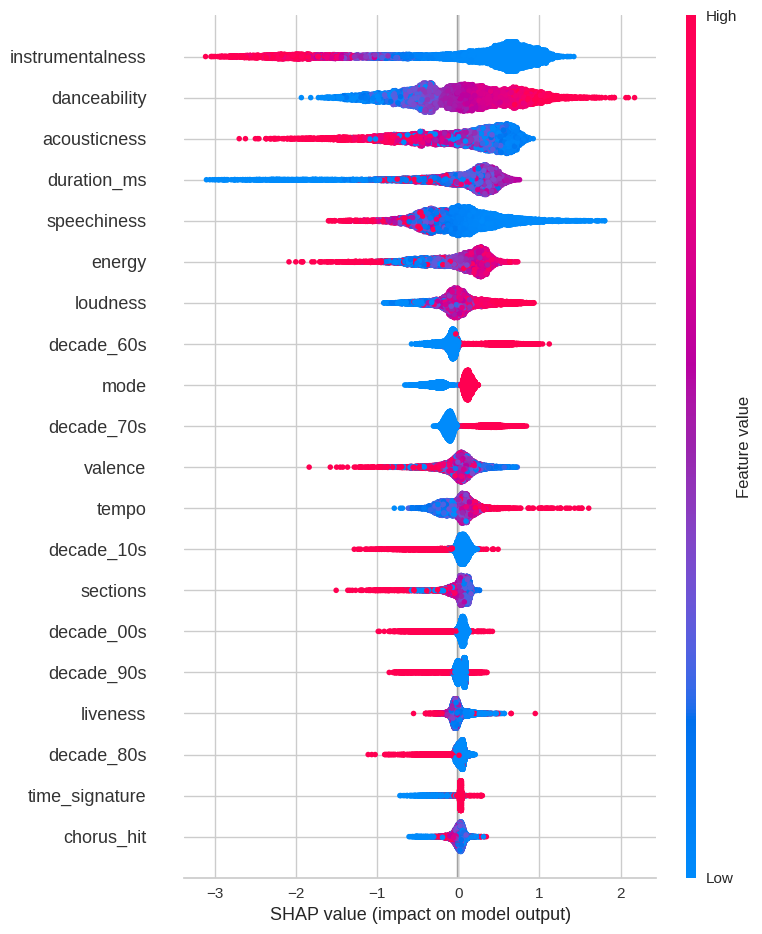

'\nUse SHAP to answer: What are the characteristics of hit songs?\n\n1. Songs with low values of instrumentalness have a higher probablity of being a hit.\n2. Songs with high values of danceability have a higher probability of being a hit.\n3. Songs with low values of acousticness have a higher probability of being a hit.\n4. Songs with longer durations generally have a higher probability of being a hit.\n5. Songs with low values of speechiness have a higher probability of being a hit.\n6. Songs with high values of energy generally have a higher probablity of being a hit.\n7. Songs with high values of loudness have a higher probability of being a hit.\n8. Songs with a mode of 1 have a higher probability of being a hit.\n9. Songs with a low values of valence have a higher probability of being a hit.\n10. Songs with a high tempo have a higher probability of being a hit.\n11. Songs with fewer sections tend to have a higher probability of being a hit.\n12. Songs with low values of liveness

In [18]:
# Generates Global SHAP values

interpret_model(best)

"""
Use SHAP to answer: What are the characteristics of hit songs?

1. Songs with low values of instrumentalness have a higher probablity of being a hit.
2. Songs with high values of danceability have a higher probability of being a hit.
3. Songs with low values of acousticness have a higher probability of being a hit.
4. Songs with longer durations generally have a higher probability of being a hit.
5. Songs with low values of speechiness have a higher probability of being a hit.
6. Songs with high values of energy generally have a higher probablity of being a hit.
7. Songs with high values of loudness have a higher probability of being a hit.
8. Songs with a mode of 1 have a higher probability of being a hit.
9. Songs with a low values of valence have a higher probability of being a hit.
10. Songs with a high tempo have a higher probability of being a hit.
11. Songs with fewer sections tend to have a higher probability of being a hit.
12. Songs with low values of liveness have a higher probablity of being a hit.
13. Songs with longer time signatures have a higher probability of being a hit.

"""

In [19]:
# Save the best model and its corresponding transformation pipeline

save_model(best, 'best_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['danceability', 'energy',
                                              'loudness', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'liveness', 'valence', 'tempo',
                                              'duration_ms', 'time_signature',
                                              'chorus_hit', 'sections'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               kee...
                                                                return_df=True,
                         

In [20]:
# Load back in the pipeline to test that it works

loaded_model = load_model('best_model_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [21]:
# Using the loaded model, generate predictions for the unlabeled holdout data

new_data = df_test.drop('hit', axis = 1)

predictions = predict_model(loaded_model, data = new_data)

predictions.to_csv('predictions.csv', index=False)

predictions

,id,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,prediction_label,prediction_score
33457,33458,My Buddy Seat,The Hondells,spotify:track:00kG3Kz2rxem4XswOmtF3s,0.407,0.737,4,-7.741,1,0.0417,...,0.1230,0.925,150.052994,103000,4,29.302731,5,60s,1,0.6530
33458,33459,I'll Say Forever My Love,Jimmy Ruffin,spotify:track:00U45bMLJ8QM1kwT9i6cIL,0.554,0.621,0,-6.879,1,0.0253,...,0.3870,0.664,103.927002,181000,4,38.845692,9,60s,1,0.8642
33459,33460,What Kind Of Fool (Do You Think I Am),The Tams,spotify:track:01IpNtCBRCrPj91rgARPl3,0.740,0.386,7,-13.701,0,0.0383,...,0.1520,0.886,120.247002,117000,4,44.130131,7,60s,1,0.7672
33460,33461,In A Moment,The Intrigues,spotify:track:029711BlHKszqkSd9GaNI6,0.523,0.802,4,-5.612,1,0.0431,...,0.2020,0.966,128.578003,169000,4,29.855801,9,60s,1,0.7136
33461,33462,Up Tight,Ramsey Lewis,spotify:track:02PSTB9Cu6AQccSrMZKuKo,0.731,0.660,0,-10.931,1,0.0340,...,0.0715,0.768,134.386993,349000,4,43.856258,14,60s,0,0.8643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40881,40882,"Slow Motion (From ""Bharat"")",Shreya Ghoshal,spotify:track:7yEuRloGyxyu1KaWBTPP1Z,0.574,0.738,10,-5.526,1,0.0958,...,0.0959,0.307,109.996002,247000,4,44.320271,9,10s,1,0.8744
40882,40883,Enna Nadanthalum,Hiphop Tamizha,spotify:track:7yk8CT3m3KI8u6DEWc3dFk,0.733,0.752,6,-3.472,0,0.0340,...,0.1570,0.763,87.996002,245000,4,22.633160,8,10s,1,0.8701
40883,40884,Seven,Sleeping At Last,spotify:track:7zbFh74zImpQho3btxuANN,0.457,0.463,3,-11.560,1,0.0421,...,0.1080,0.117,119.827003,262000,4,36.946259,13,10s,0,0.5245
40884,40885,Shell Shocked (feat. Kill The Noise & Madsonik...,Juicy J,spotify:track:7zBQRGpYImAdIZc97FNj3V,0.596,0.815,6,-5.668,0,0.0755,...,0.1740,0.459,165.014999,207000,4,61.991161,9,10s,1,0.8838
